In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading the Data

In [2]:
data = pd.read_csv("owid-covid-data.csv")
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [3]:
iran_data = data[data['location'] == 'Iran']
iran_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
77029,IRN,Asia,Iran,2020-02-19,2.0,2.0,NaN,2.0,2.0,NaN,...,0.8,21.1,NaN,1.5,76.68,0.783,NaN,NaN,NaN,NaN
77030,IRN,Asia,Iran,2020-02-20,5.0,3.0,NaN,2.0,0.0,NaN,...,0.8,21.1,NaN,1.5,76.68,0.783,NaN,NaN,NaN,NaN
77031,IRN,Asia,Iran,2020-02-21,18.0,13.0,NaN,4.0,2.0,NaN,...,0.8,21.1,NaN,1.5,76.68,0.783,NaN,NaN,NaN,NaN
77032,IRN,Asia,Iran,2020-02-22,28.0,10.0,NaN,5.0,1.0,NaN,...,0.8,21.1,NaN,1.5,76.68,0.783,NaN,NaN,NaN,NaN
77033,IRN,Asia,Iran,2020-02-23,43.0,15.0,NaN,8.0,3.0,NaN,...,0.8,21.1,NaN,1.5,76.68,0.783,-2658.0,-4.14,2.79,-31.260011


# Data Preprocessing

In [4]:
iran_data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [5]:
cleaned_iran_data = iran_data[['date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'new_tests'
                             ]]

In [6]:
cleaned_iran_data.index -= 77000

In [7]:
cleaned_iran_data.isnull().sum()

date              0
total_cases       0
new_cases         0
total_deaths      0
new_deaths        0
new_tests       485
dtype: int64

In [8]:
cleaned_iran_data['new_tests'].fillna(method='bfill', inplace=True)

/home/poj/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [9]:
cleaned_iran_data['new_tests'].fillna(method='ffill', inplace=True)

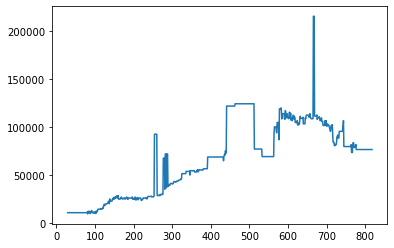

In [10]:
plt.plot(cleaned_iran_data.index, cleaned_iran_data['new_tests'])

In [11]:
cleaned_iran_data.isnull().sum()

date            0
total_cases     0
new_cases       0
total_deaths    0
new_deaths      0
new_tests       0
dtype: int64

In [12]:
cleaned_iran_data['date'] = pd.to_datetime(cleaned_iran_data['date'])

/tmp/ipykernel_34866/3026143534.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_iran_data['date'] = pd.to_datetime(cleaned_iran_data['date'])


In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

degree = 9

regression_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

X = np.array(cleaned_iran_data.index)
y = cleaned_iran_data['new_tests']

regression_model.fit(X.reshape(-1, 1), y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=9)),
                ('linearregression', LinearRegression())])

/tmp/ipykernel_34866/1141638613.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_iran_data['new_tests_reg'] = new_tests_reg


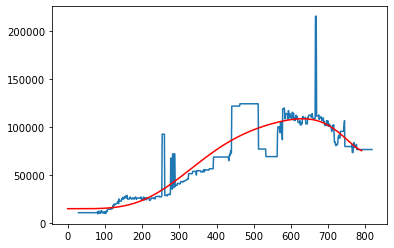

In [14]:
plt.plot(X, y)
X_seq = np.linspace(0,cleaned_iran_data.shape[0], 790).reshape(-1, 1)
new_tests_reg = regression_model.predict(X_seq)
plt.plot(X_seq, new_tests_reg, color = 'red')
cleaned_iran_data['new_tests_reg'] = new_tests_reg
plt.show()

In [15]:
cleaned_iran_data.to_csv("covid19_iran.csv")
cleaned_iran_data.head()

,date,total_cases,new_cases,total_deaths,new_deaths,new_tests,new_tests_reg
29,2020-02-19,2.0,2.0,2.0,2.0,10418.0,14567.660805
30,2020-02-20,5.0,3.0,2.0,0.0,10418.0,14567.660805
31,2020-02-21,18.0,13.0,4.0,2.0,10418.0,14567.660807
32,2020-02-22,28.0,10.0,5.0,1.0,10418.0,14567.660826
33,2020-02-23,43.0,15.0,8.0,3.0,10418.0,14567.660894


/tmp/ipykernel_34866/304347120.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_iran_data['new_tests_reg'] = new_tests_reg


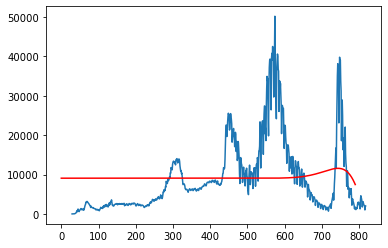

In [19]:

degree = 24

regression_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

X = np.array(cleaned_iran_data.index)
y = cleaned_iran_data['new_cases']

regression_model.fit(X.reshape(-1, 1), y)

plt.plot(X, y)
X_seq = np.linspace(0,cleaned_iran_data.shape[0], 790).reshape(-1, 1)
new_tests_reg = regression_model.predict(X_seq)
plt.plot(X_seq, new_tests_reg, color = 'red')
cleaned_iran_data['new_tests_reg'] = new_tests_reg
plt.show()

In [36]:
best_deg = 10007520573471
best_model = np.nan
from sklearn.metrics import mean_squared_error
for deg in range(1, 25):

    regression_model = make_pipeline(PolynomialFeatures(deg), LinearRegression())
    X = np.array(cleaned_iran_data.index)
    y = cleaned_iran_data['new_cases']
    regression_model.fit(X.reshape(-1, 1), y)
    X_seq = np.linspace(0,cleaned_iran_data.shape[0], 790).reshape(-1, 1)
    y_pred = regression_model.predict(X_seq)
    curr_err = mean_squared_error(y_pred, y)
    print(f"current error : {curr_err}, deg : {deg}")
    if curr_err < err:
        print(f"new deg found! {deg}")
        best_deg = deg
        best_model = regression_model
        err = curr_err

print(best_deg)

current error : 72484090.26501708, deg : 1
current error : 61387529.64351784, deg : 2
current error : 54771627.128368974, deg : 3
current error : 54526654.85560635, deg : 4
current error : 52714875.998940855, deg : 5
current error : 52306619.94878366, deg : 6
current error : 52025865.749925785, deg : 7
current error : 50524118.46390058, deg : 8
current error : 49412201.59141055, deg : 9
current error : 49907010.81850958, deg : 10
current error : 51263153.169448294, deg : 11
current error : 51855849.8715431, deg : 12
current error : 50871494.13204405, deg : 13
current error : 63917178.25596085, deg : 14
current error : 70119165.93654123, deg : 15
current error : 75507264.63449113, deg : 16
current error : 79676048.79350111, deg : 17
current error : 82552399.91534434, deg : 18
current error : 84293343.43100384, deg : 19
current error : 85173801.10760768, deg : 20
current error : 85495201.9156457, deg : 21
current error : 85525528.52426337, deg : 22
current error : 85469080.34412187, deg 

/tmp/ipykernel_34866/2217566903.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_iran_data['new_tests_reg'] = new_tests_reg


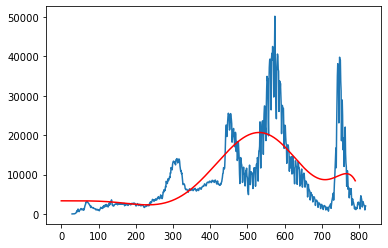

In [31]:
plt.plot(X, y)
X_seq = np.linspace(0,cleaned_iran_data.shape[0], 790).reshape(-1, 1)
new_tests_reg = best_model.predict(X_seq)
plt.plot(X_seq, new_tests_reg, color = 'red')
cleaned_iran_data['new_tests_reg'] = new_tests_reg
plt.show()

/home/poj/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.06185e-54): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/tmp/ipykernel_34866/700748534.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_iran_data['new_tests_reg'] = new_tests_reg


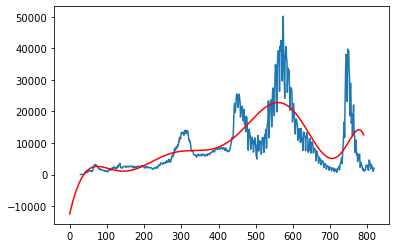

In [78]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, ARDRegression, ElasticNet, Lasso
from sklearn.gaussian_process import GaussianProcessRegressor
model = make_pipeline(PolynomialFeatures(9), Ridge())
#model = GaussianProcessRegressor()
X = np.array(cleaned_iran_data.index)
y = cleaned_iran_data['new_cases']
model.fit(X.reshape(-1, 1), y)
plt.plot(X, y)
X_seq = np.linspace(0,790, 790).reshape(-1, 1)
new_tests_reg = model.predict(X_seq)
plt.plot(X_seq, new_tests_reg, color = 'red')
cleaned_iran_data['new_tests_reg'] = new_tests_reg
#print(mean_squared_error(new_tests_reg, y))
plt.show()

In [51]:
from sklearn.utils import all_estimators

estimators = all_estimators(type_filter='regressor')

all_regs = []
for name, RegressorClass in estimators:
    try:
        print('Appending', name)
        reg = RegressorClass()
        all_regs.append(reg)
    except Exception as e:
        print(e)

Appending ARDRegression
Appending AdaBoostRegressor
Appending BaggingRegressor
Appending BayesianRidge
Appending CCA
Appending DecisionTreeRegressor
Appending DummyRegressor
Appending ElasticNet
Appending ElasticNetCV
Appending ExtraTreeRegressor
Appending ExtraTreesRegressor
Appending GammaRegressor
Appending GaussianProcessRegressor
Appending GradientBoostingRegressor
Appending HistGradientBoostingRegressor
Appending HuberRegressor
Appending IsotonicRegression
Appending KNeighborsRegressor
Appending KernelRidge
Appending Lars
Appending LarsCV
Appending Lasso
Appending LassoCV
Appending LassoLars
Appending LassoLarsCV
Appending LassoLarsIC
Appending LinearRegression
Appending LinearSVR
Appending MLPRegressor
Appending MultiOutputRegressor
__init__() missing 1 required positional argument: 'estimator'
Appending MultiTaskElasticNet
Appending MultiTaskElasticNetCV
Appending MultiTaskLasso
Appending MultiTaskLassoCV
Appending NuSVR
Appending OrthogonalMatchingPursuit
Appending OrthogonalM

# Data Visualization

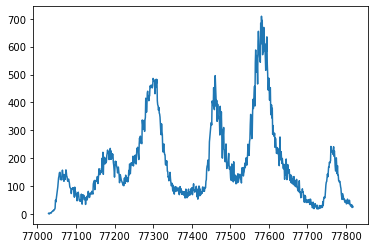

In [60]:
plt.plot(iran_data.index, iran_data['new_deaths'])

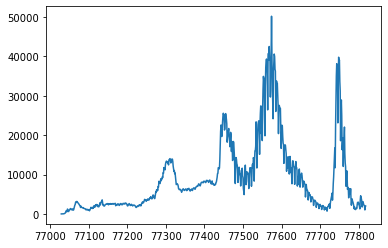

In [61]:
plt.plot(iran_data.index, iran_data['new_cases'])